In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from warnings import filterwarnings
filterwarnings('ignore')
from itertools import combinations
from collections import Counter


In [147]:
customer= pd.read_csv('CUSTOMERS.csv').convert_dtypes()
location= pd.read_csv('GEO_LOCATION.csv').convert_dtypes()
items= pd.read_csv('ORDER_ITEMS.csv').convert_dtypes()
payment= pd.read_csv('ORDER_PAYMENTS.csv').convert_dtypes()
review = pd.read_csv('ORDER_REVIEW_RATINGS.csv').convert_dtypes()
orders= pd.read_csv('ORDERS.csv').convert_dtypes()
product= pd.read_csv('PRODUCTS.csv').convert_dtypes()
sellers= pd.read_csv('SELLERS.csv').convert_dtypes()

Data Audit


In [148]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [149]:
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.64482,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [150]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.9,18.14


In [151]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [152]:
review.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [153]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [154]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,Baby,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,Housewares,37,402,4,625,20,17,13


In [155]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [156]:
#checking missing values

In [157]:
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [158]:
location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [159]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [160]:
payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [161]:
review.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [162]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [163]:
product.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [164]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

# 1. Perform Detailed exploratory analysis 

a) Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, 
Total sellers, Total locations, Total channels, Total payment methods etc…)

In [165]:
print('Total customer= ',customer['customer_unique_id'].count())
print('Total locations= ',location['geolocation_zip_code_prefix'].count())
print('Total payments= ',payment['order_id'].count())
print('Total Reviews= ',review['review_id'].count())
print('Total products= ',product['product_id'].count())
print('Total orders= ',orders['order_id'].count())
print('Total sellers= ',sellers['seller_id'].count())
print('Total revenue= ',payment['payment_value'].sum())
print('Total channels= ',payment['payment_type'].unique().__len__())

Total customer=  99441
Total locations=  19015
Total payments=  103886
Total Reviews=  100000
Total products=  32951
Total orders=  99441
Total sellers=  3095
Total revenue=  16008872.12
Total channels=  5


b. Understanding how many new customers acquired every month

In [166]:
orders['order_purchase_timestamp']= pd.to_datetime(orders['order_purchase_timestamp'])
orders['month']=pd.to_datetime(orders['order_purchase_timestamp']).dt.month
orders['year']=pd.to_datetime(orders['order_purchase_timestamp']).dt.year
orders['week']=pd.to_datetime(orders['order_purchase_timestamp']).dt.isocalendar().week


In [167]:
cust_order = customer.merge(orders,on='customer_id',how='inner')

In [168]:
monthly_new_customers=cust_order.drop_duplicates(subset=['customer_unique_id'],keep='first').groupby(by=['year','month']).count()['customer_unique_id'].to_frame()

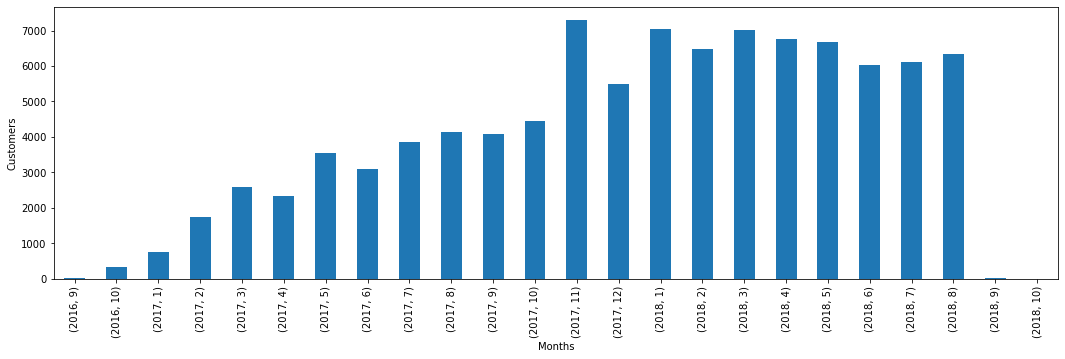

In [169]:
monthly_new_customers.plot(kind='bar',xlabel='Months',ylabel='Customers',legend=False,figsize=(18,5))
plt.show()

c. Understand the retention of customers on month on month basis


In [170]:
cust_order1 = customer.merge(orders,on='customer_id',how='inner')[['customer_unique_id','order_purchase_timestamp']]
min_date= cust_order1.groupby(by='customer_unique_id').min().rename(columns={'order_purchase_timestamp':'start_date'})

In [171]:
cust_order1= cust_order1.merge(min_date,on='customer_unique_id',how='inner')
cust_order1['active_months']=round((cust_order1['order_purchase_timestamp']-cust_order1['start_date'])/np.timedelta64(1, 'M'),0)

In [172]:
MOM_retention=cust_order1[['customer_unique_id','active_months']].groupby('active_months').count().drop(0.0,axis=0)

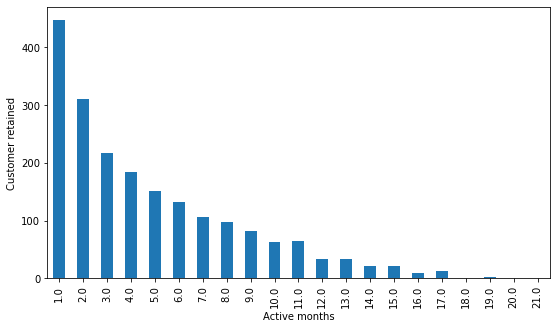

In [173]:
MOM_retention.plot(kind='bar',ylabel='Customer retained',legend=False,xlabel='Active months',figsize=(9,5))
plt.show()

d. How the revenues from existing/new customers on month on month basis 

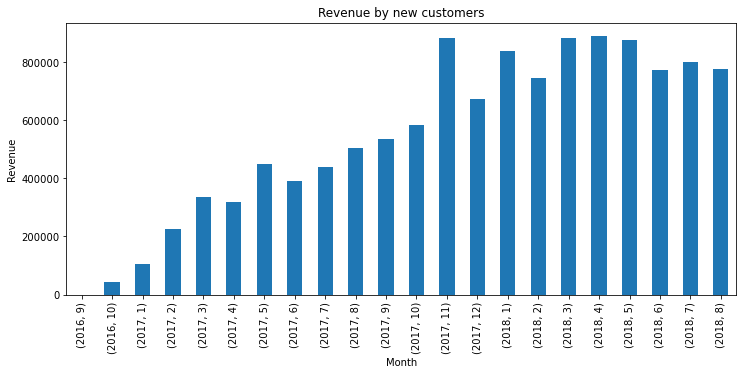

In [174]:
# From new customers:
new=cust_order.merge(items,on='order_id',how='inner').drop_duplicates(subset=['customer_unique_id'],keep='first').groupby(by=['year','month']).sum()['price'].to_frame()
new.plot(kind='bar',ylabel='Revenue',figsize=(12,5),xlabel='Month',legend=False,title='Revenue by new customers')
plt.show()

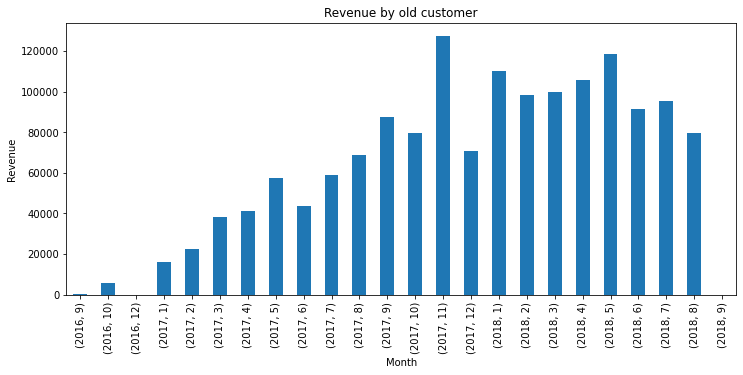

In [175]:
#For old customers
total=cust_order.merge(items,on='order_id',how='inner').groupby(by=['year','month']).sum()['price'].to_frame()
old=total-new
old.plot(kind='bar',ylabel='Revenue',figsize=(12,5),xlabel='Month',legend=False,title='Revenue by old customer')
plt.show()

e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


In [176]:
order_payment = orders.merge(payment,on='order_id')

#Sales:

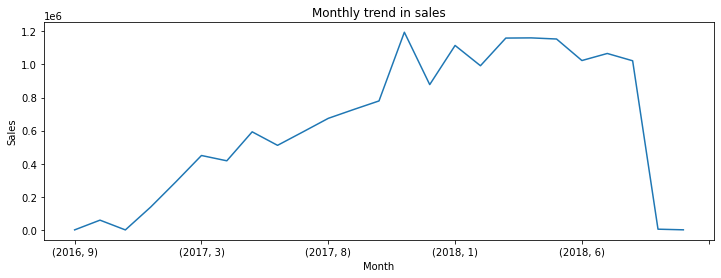

In [177]:
#BY month
monthly_amount=order_payment.groupby(by=['year','month'])['payment_value'].sum()
monthly_amount.plot(kind='line',xlabel='Month',ylabel='Sales',title='Monthly trend in sales',figsize=(12,4))
plt.show()

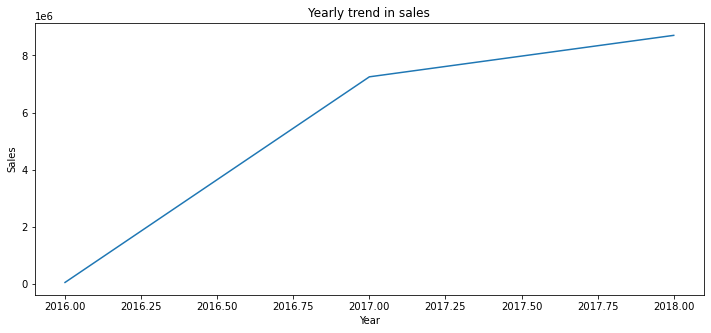

In [178]:
#By year
yearly_amount=order_payment.groupby(by=order_payment.order_purchase_timestamp.dt.year)['payment_value'].sum()
yearly_amount.plot(kind='line',xlabel='Year',ylabel='Sales',title='Yearly trend in sales',figsize=(12,5))
plt.show()

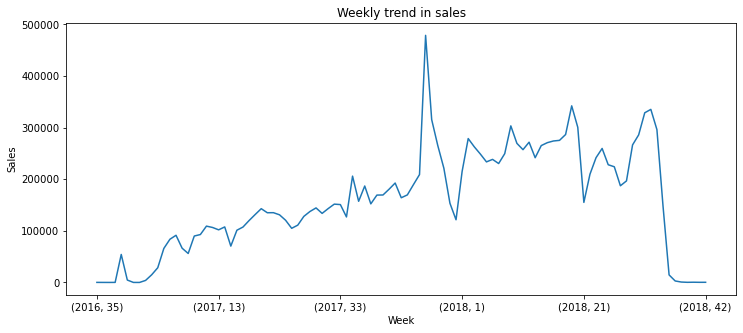

In [179]:
#By week
weekly_amount=order_payment.groupby(by=['year','week'])['payment_value'].sum()
weekly_amount.plot(kind='line',xlabel='Week',ylabel='Sales',title='Weekly trend in sales',figsize=(12,5))
plt.show()

Total Quantites

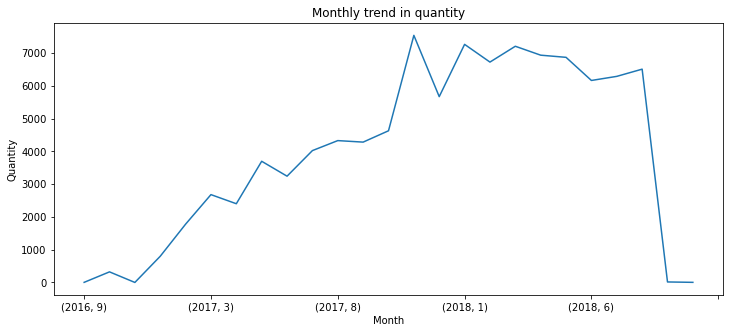

In [180]:

#Monthly
yearly_quantity=orders.groupby(by=['year','month']).count()['order_id']
yearly_quantity.plot(kind='line',xlabel='Month',ylabel='Quantity',title='Monthly trend in quantity',figsize=(12,5))
plt.show()

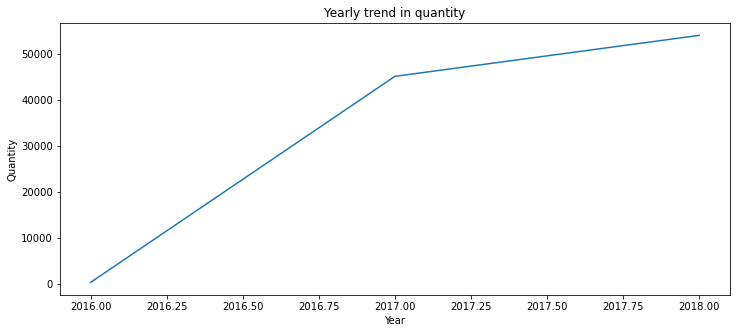

In [181]:
#Yearly
yearly_quantity=orders.groupby(by=['year']).count()['order_id']
yearly_quantity.plot(kind='line',xlabel='Year',ylabel='Quantity',title='Yearly trend in quantity',figsize=(12,5))
plt.show()

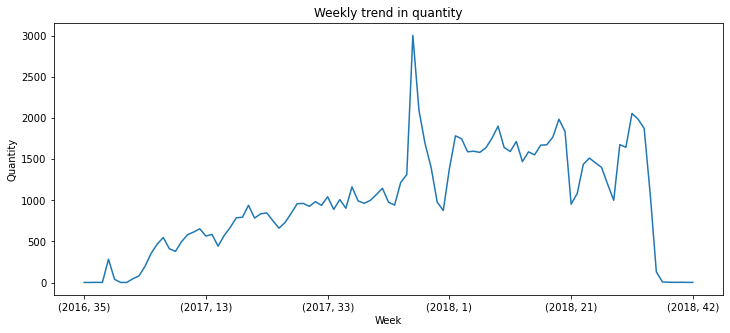

In [182]:
#Weekly
yearly_quantity=orders.groupby(by=['year','week']).count()['order_id']
yearly_quantity.plot(kind='line',xlabel='Week',ylabel='Quantity',title='Weekly trend in quantity',figsize=(12,5))
plt.show()

Quantities by categories

In [183]:
product_items = product.merge(items,on='product_id', how='inner')
product_items_orders= product_items.merge(orders,on='order_id',how='inner')

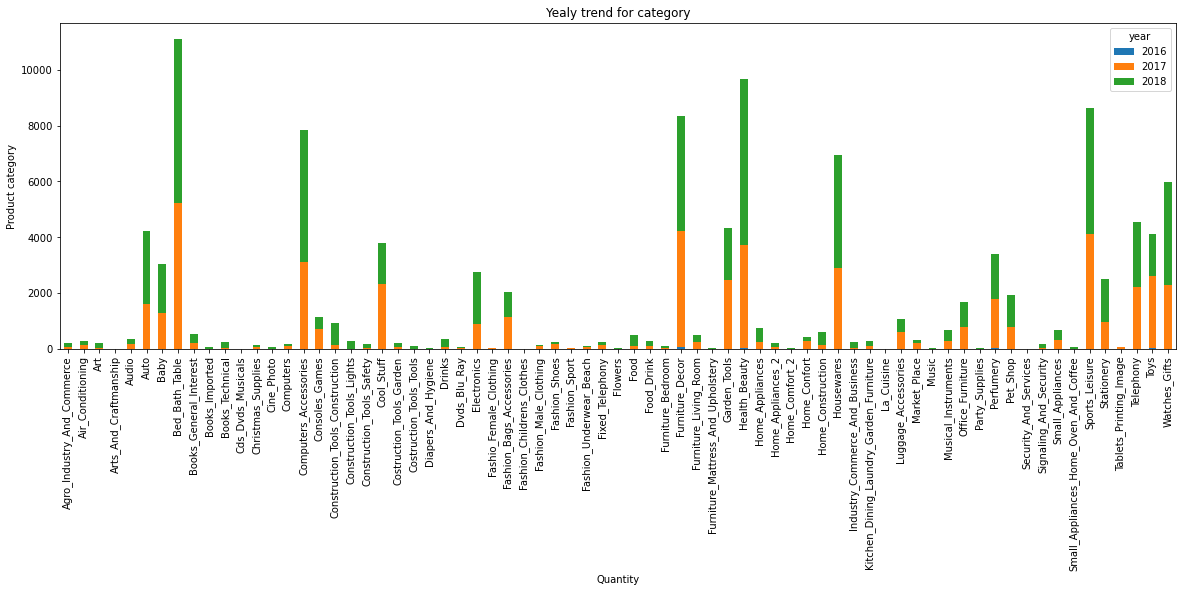

In [184]:
#Yearly sales by each category
yearly_category_sales=product_items_orders.pivot_table(columns='year',index='product_category_name',values='order_id',aggfunc='count')
yearly_category_sales.plot(kind='bar',stacked=True, figsize=(20,6),xlabel='Quantity',ylabel='Product category',title='Yealy trend for category')
plt.show()

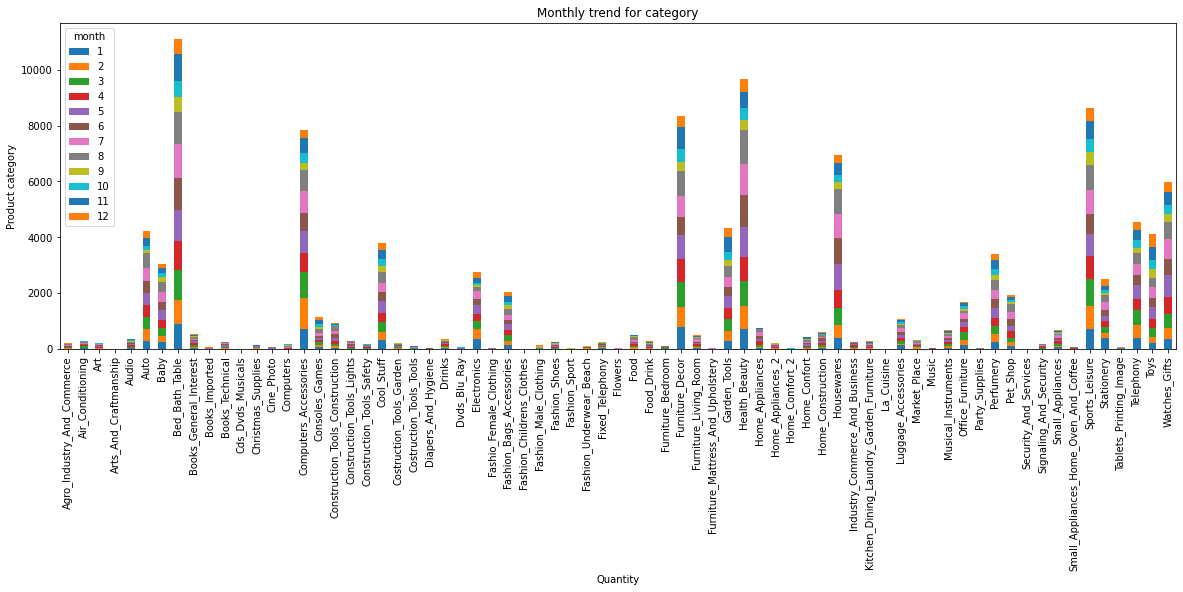

In [185]:
#Monthly sales by each category
monthly_category_sales=product_items_orders.pivot_table(columns='month',index='product_category_name',values='order_id',aggfunc='count')
monthly_category_sales.plot(kind='bar',stacked=True, figsize=(20,6),xlabel='Quantity',ylabel='Product category',title='Monthly trend for category')
plt.show()

#Sales by location

In [186]:
cust_order_product_items = product_items_orders.merge(customer,on='customer_id',how='inner')

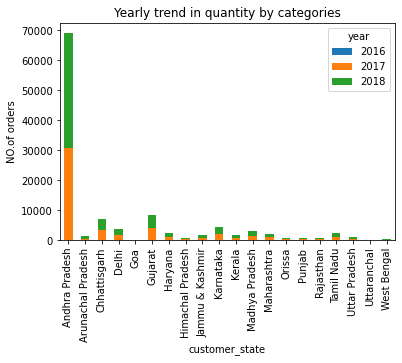

In [187]:
#Yearly
loc_year=cust_order_product_items.pivot_table(columns='year',index='customer_state',values='order_id',aggfunc='count')
loc_year.plot(kind='bar',stacked=True,ylabel='NO.of orders',title='Yearly trend in quantity by categories')
plt.show()

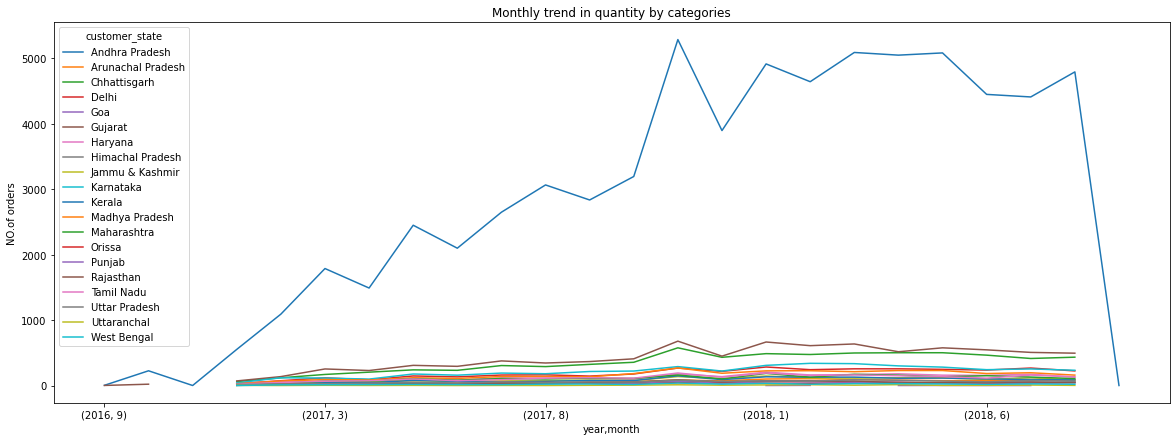

In [188]:
#Monthly
loc_month=cust_order_product_items.pivot_table(index=['year','month'],columns='customer_state',values='order_id',aggfunc='count')
loc_month.plot(kind='line',ylabel='NO.of orders',figsize=(20,7),title='Monthly trend in quantity by categories')
plt.show()

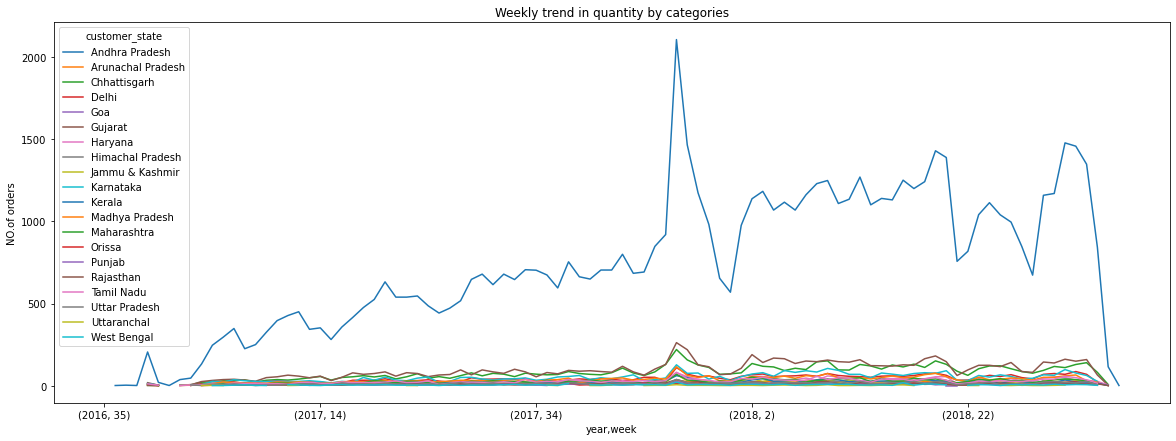

In [189]:
#Weekly
loc_weekly=cust_order_product_items.pivot_table(index=['year','week'],columns='customer_state',values='order_id',aggfunc='count')
loc_weekly.plot(kind='line',ylabel='NO.of orders',figsize=(20,7),title='Weekly trend in quantity by categories')
plt.show()

Trends by Payment methods

In [190]:
payment_orders=payment.merge(orders, on ='order_id',how='inner')

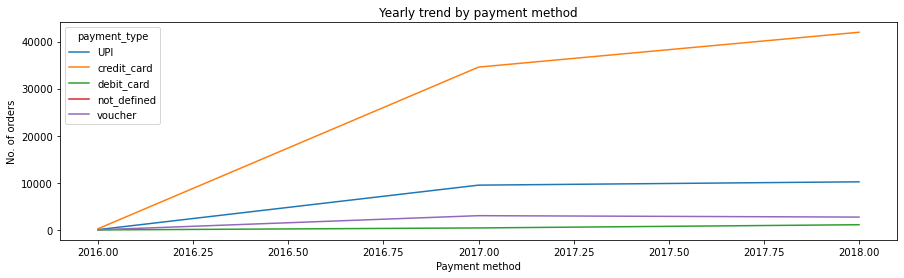

In [191]:
#Yearly
meth_year= payment_orders.pivot_table(index='payment_type',columns='year',values='order_id',aggfunc='count').T
meth_year.plot(kind='line',ylabel='No. of orders',xlabel='Payment method', title='Yearly trend by payment method',figsize=(15,4))
plt.show()

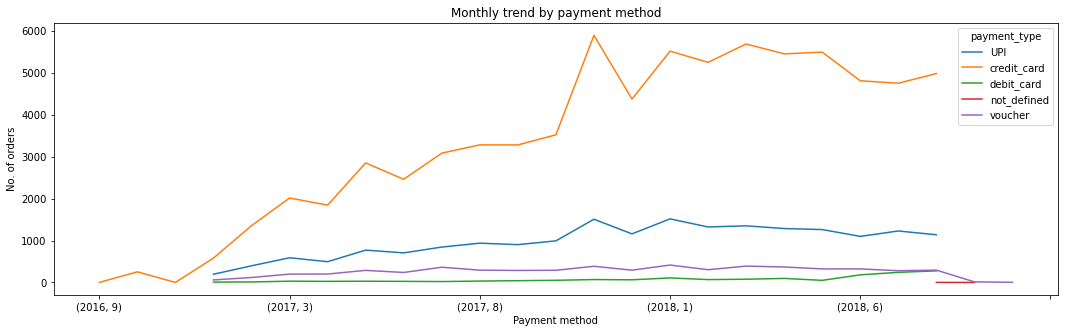

In [192]:
#Monthly
meth_month= payment_orders.pivot_table(columns='payment_type',index=['year','month'],values='order_id',aggfunc='count')
meth_month.plot(kind='line',ylabel='No. of orders',xlabel='Payment method', title='Monthly trend by payment method',figsize=(18,5))
plt.show()

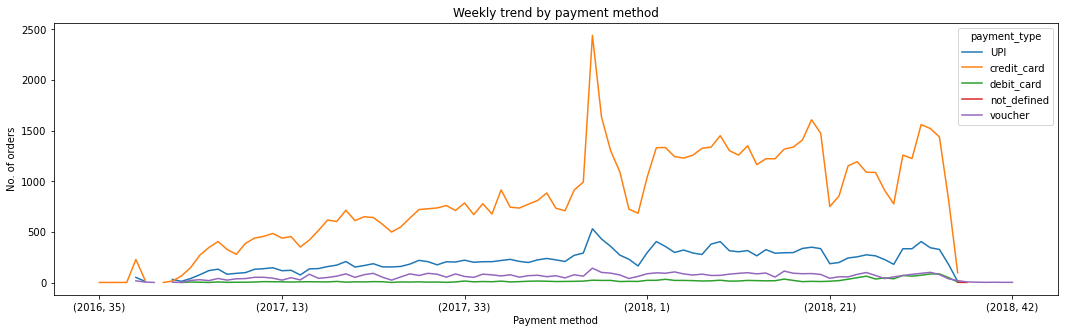

In [193]:
#Weekly
meth_week= payment_orders.pivot_table(columns='payment_type',index=['year','week'],values='order_id',aggfunc='count')
meth_week.plot(kind='line',ylabel='No. of orders',xlabel='Payment method', title='Weekly trend by payment method',figsize=(18,5))
plt.show()

f. Popular Products by month, seller, state, category.

In [194]:
#By category
top_prod_by_cat= product_items_orders.groupby(by=['product_category_name','product_id'])['order_id'].count().to_frame()
top_prod_by_cat.sort_values(['product_category_name','order_id'],ascending=False,inplace=True)


In [195]:
a = pd.DataFrame()
for i in top_prod_by_cat.index.get_level_values(0).unique():
    a = a.append(top_prod_by_cat.loc[[i]].head(1))


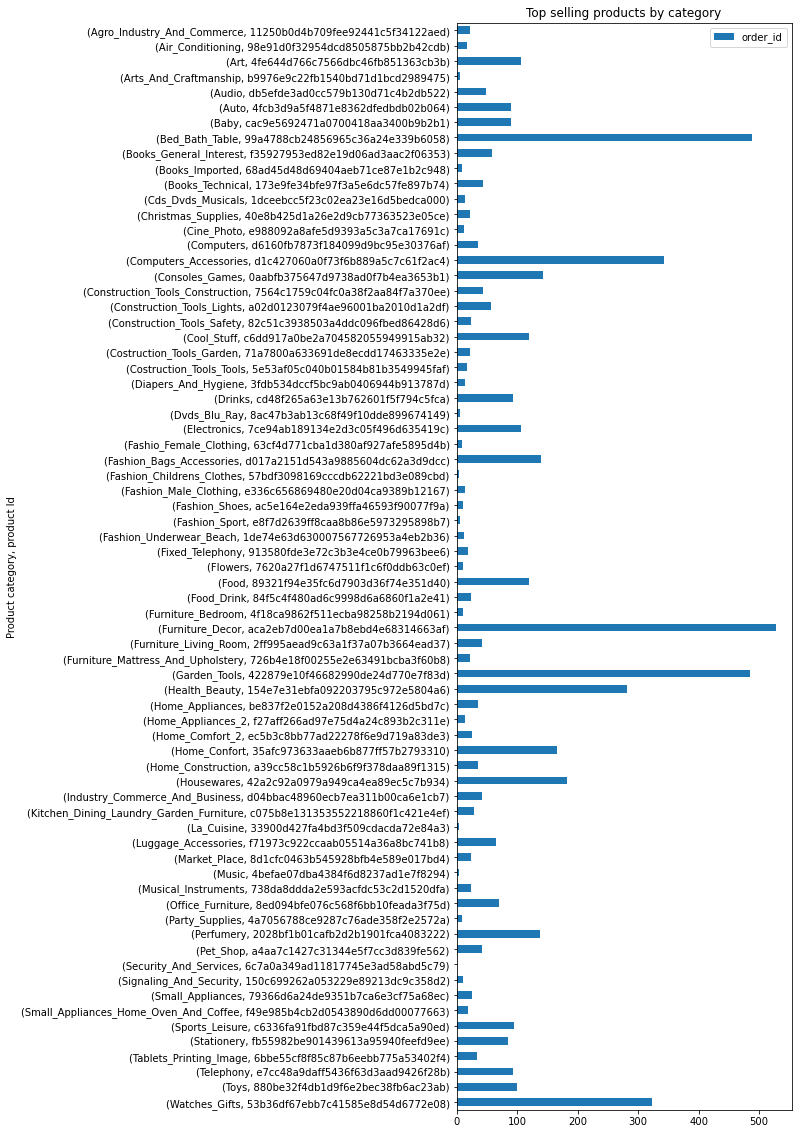

In [196]:
a.plot(kind='barh' ,xlabel='Product category, product Id', ylabel='No.of orders', title='Top selling products by category',figsize=(6,20))
plt.show()

In [197]:
# By seller
order_item_seller= orders.merge(items, on='order_id',how='inner').merge(sellers,on='seller_id',how='inner')
top_prod_by_seller=order_item_seller.groupby(['seller_id','product_id'])['order_id'].count().to_frame()
top_prod_by_seller.sort_values(['seller_id','order_id'],ascending=False,inplace=True)

In [198]:
b = pd.DataFrame()
for i in top_prod_by_seller.index.get_level_values(0).unique():
    b= b.append(top_prod_by_seller.loc[[i]].head(1))

In [199]:
b.rename(columns={'order_id':'No. of orders'},inplace=True)
display(b)

,,No. of orders
seller_id,product_id,
ffff564a4f9085cd26170f4732393726,8f7a3322e1abfed89ac080b0f7364779,2
fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6
ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
...,...,...
003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1


In [200]:
#By state
cust_order_product_items= cust_order.merge(items,on='order_id',how='inner').merge(product,on='product_id',how='inner')
top_prod_by_state=cust_order_product_items.groupby(by=['customer_state','product_id'])['order_id'].count().to_frame()
top_prod_by_state.sort_values(['customer_state','order_id'],ascending=False,inplace=True)

In [201]:
c = pd.DataFrame()
for i in top_prod_by_state.index.get_level_values(0).unique():
    c= c.append(top_prod_by_state.loc[[i]].head(1))

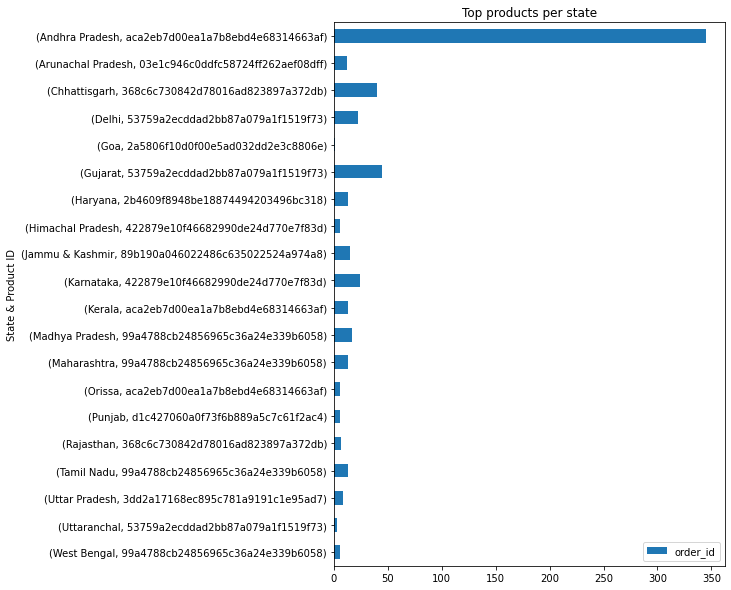

In [202]:
c.plot(kind='barh',figsize=(7,10),ylabel='No. of orders',xlabel='State & Product ID',title='Top products per state')
plt.show()

In [203]:
#By month
top_prod_per_month=cust_order_product_items.groupby(by=['year','month','product_id'])['order_id'].count().to_frame()
top_prod_per_month.sort_values(['year','order_id'],ascending=False,inplace=True)

In [204]:
d= pd.DataFrame()
for i in top_prod_per_month.index.get_level_values(0).unique():
    for j in top_prod_per_month.loc[[i],:].index.get_level_values(1).unique():
        d = d.append(top_prod_per_month[(top_prod_per_month.index.get_level_values(0)==i) & (top_prod_per_month.index.get_level_values(1)==j)].head(1))
d.sort_index(level=['year','month'],inplace=True)

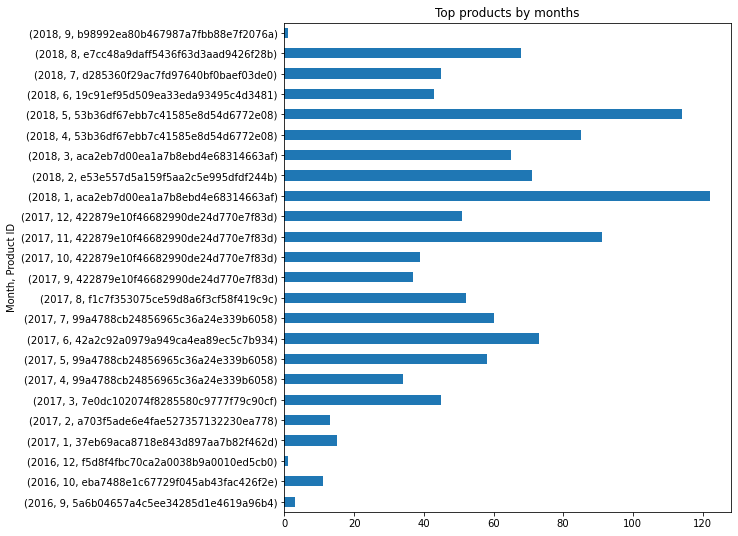

In [205]:
d.plot(kind='barh',xlabel='Month, Product ID',ylabel='No. of Orders',title='Top products by months',legend=False,figsize=(8,9))
plt.show()

g. Popular categories by state, month


In [206]:
product_items_orders_customer = product_items_orders.merge(customer, on='customer_id',how='inner')

In [207]:

# By State
top_cat_by_state=product_items_orders_customer.groupby(by=['customer_state','product_category_name'])['order_id'].count().to_frame()
top_cat_by_state.sort_values(['customer_state','order_id'],ascending=False,inplace=True)

In [208]:
g = pd.DataFrame()
for i in top_cat_by_state.index.get_level_values(0).unique():
    g = g.append(top_cat_by_state.loc[[i]].head(1))

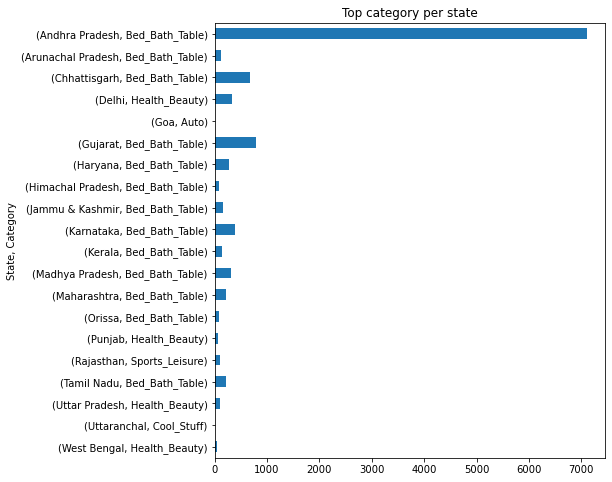

In [209]:
g.plot(kind='barh',xlabel='State, Category',ylabel='No. of orders', title='Top category per state',figsize=(7,8),legend=False)
plt.show()

In [210]:
#By month
top_cat_by_month=product_items_orders_customer.groupby(by=['year','month','product_category_name'])['order_id'].count().to_frame()
top_cat_by_month.sort_values(['year','order_id'],ascending=False,inplace=True)

In [211]:
h= pd.DataFrame()
for i in top_cat_by_month.index.get_level_values(0).unique():
    for j in top_cat_by_month.loc[[i],:].index.get_level_values(1).unique():
        h = h.append(top_cat_by_month[(top_cat_by_month.index.get_level_values(0)==i) & (top_cat_by_month.index.get_level_values(1)==j)].head(1))
h.sort_index(level=['year','month'],inplace=True)
#h.reset_index(inplace=True)

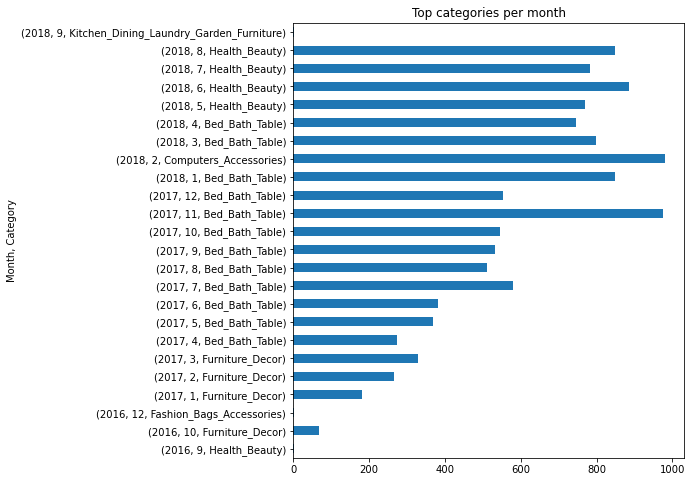

In [212]:
h.plot(kind='barh',ylabel='No.of orders',xlabel='Month, Category', figsize=(7,8),title='Top categories per month',legend=False)
plt.show()

h. List top 10 most expensive products sorted by price


In [213]:
top_10_expensive_products=items.sort_values(by='price',ascending=False)[['product_id','price']].head(10)
top_10_expensive_products.set_index('product_id',inplace=True)

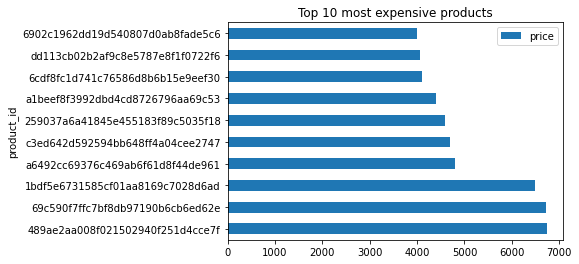

In [214]:
top_10_expensive_products.plot(kind='barh',title='Top 10 most expensive products')
plt.show()

# 2. Performing Customers/sellers Segmentation

a. Divide the customers into groups based on the revenue generated 

In [215]:
customer= pd.read_csv('CUSTOMERS.csv').convert_dtypes()
revenue=cust_order_product_items.groupby(by='customer_unique_id')['price'].sum().sort_values(ascending=False).to_frame()
revenue['revenue_category'] = np.where(revenue.price<5000,'Low',np.where(revenue.price<10000,'Medium','High'))
revenue.reset_index(inplace=True)
customer = customer.merge(revenue,on='customer_unique_id',how='inner')
customer.drop(columns='price',axis=1,inplace=True)
customer.head()



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,revenue_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,Low
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,Low
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,Low
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,Low
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,Low


b. Divide the sellers into groups based on the revenue generated 


In [216]:
items= pd.read_csv('ORDER_ITEMS.csv').convert_dtypes()
revenue_seller=items.groupby(by='seller_id')['price'].sum().sort_values().to_frame()
revenue_seller['revenue_category'] = np.where(revenue_seller.price<10000,'Low',np.where(revenue_seller.price<20000,'Medium','High'))
revenue_seller.reset_index(inplace=True)
sellers = sellers.merge(revenue_seller,on='seller_id',how='inner')
sellers.drop(columns='price',axis=1,inplace=True)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,revenue_category
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh,Low
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh,Medium
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh,Low
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh,Low
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh,Low


# 3. Cross-Selling (Which products are selling together)



In [217]:
# For 2 products
new= items.drop(columns=['order_item_id'])
new = items[items['order_id'].duplicated(keep=False)]
new = new.drop_duplicates(subset=['order_id','product_id'])
new['repeat_products'] = new.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))



In [219]:
count2 = Counter()
for i in new['repeat_products']:
    row = i.split(',')
    count2.update(Counter(combinations(row,2)))
Cross2 = pd.DataFrame(count2.most_common(10),columns=['Products','No. of orders'])
Cross2.set_index('Products',inplace=True)
Cross2


,No. of orders
Products,
"(e53e557d5a159f5aa2c5e995dfdf244b, 36f60d45225e60c7da4558b070ce4b60)",40
"(35afc973633aaeb6b877ff57b2793310, 99a4788cb24856965c36a24e339b6058)",31
"(99a4788cb24856965c36a24e339b6058, 35afc973633aaeb6b877ff57b2793310)",30
"(36f60d45225e60c7da4558b070ce4b60, e53e557d5a159f5aa2c5e995dfdf244b)",28
"(f4f67ccaece962d013a4e1d7dc3a61f7, 4fcb3d9a5f4871e8362dfedbdb02b064)",22
"(422879e10f46682990de24d770e7f83d, 389d119b48cf3043d311335e499d9c6b)",19
"(3f14d740544f37ece8a9e7bc8349797e, 36f60d45225e60c7da4558b070ce4b60)",16
"(389d119b48cf3043d311335e499d9c6b, 53759a2ecddad2bb87a079a1f1519f73)",15
"(946344697156947d846d27fe0d503033, ad0a798e7941f3a5a2fb8139cb62ad78)",14


In [220]:
#For 3 products
count3 = Counter()
for i in new['repeat_products']:
    row = i.split(',')
    count3.update(Counter(combinations(row,3)))
Cross3 = pd.DataFrame(count3.most_common(10),columns=['Products','No. of orders'])
Cross3.set_index('Products',inplace=True)
Cross3

,No. of orders
Products,
"(946344697156947d846d27fe0d503033, ad0a798e7941f3a5a2fb8139cb62ad78, b0c89945c034268074f5f80b362bda34)",8
"(1065e0ebef073787a7bf691924c60eeb, 0cf2faf9749f53924cea652a09d8e327, 0de59eddc63167215c972b0d785ffa7b)",8
"(1065e0ebef073787a7bf691924c60eeb, 0cf2faf9749f53924cea652a09d8e327, 5dae498eff2d80057f56122235a36aff)",8
"(1065e0ebef073787a7bf691924c60eeb, 0cf2faf9749f53924cea652a09d8e327, 4a5c3967bfd3629fe07ef4d0cc8c3818)",8
"(1065e0ebef073787a7bf691924c60eeb, 0cf2faf9749f53924cea652a09d8e327, 678c229b41c0e497d35a25a8be1cc631)",8
"(1065e0ebef073787a7bf691924c60eeb, 0cf2faf9749f53924cea652a09d8e327, 21b524c4c060169fa75ccf08c7da4627)",8
"(1065e0ebef073787a7bf691924c60eeb, 0cf2faf9749f53924cea652a09d8e327, 309dd69eb83cea38c51709d62befe1a4)",8
"(1065e0ebef073787a7bf691924c60eeb, 0de59eddc63167215c972b0d785ffa7b, 5dae498eff2d80057f56122235a36aff)",8
"(1065e0ebef073787a7bf691924c60eeb, 0de59eddc63167215c972b0d785ffa7b, 4a5c3967bfd3629fe07ef4d0cc8c3818)",8


# 4. Payment Behaviour

How customers are paying?


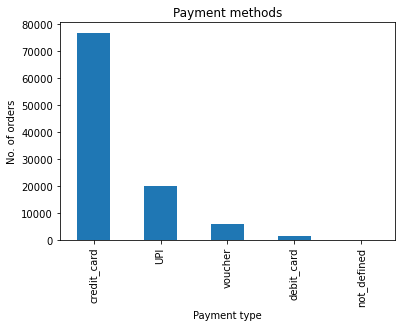

In [221]:
payment_methods=payment_orders.groupby(by='payment_type')['order_id'].count().sort_values(ascending=False).to_frame()
payment_methods.rename(columns={'order_id':'orders'},inplace=True)
payment_methods.plot(kind='bar',xlabel='Payment type',ylabel='No. of orders',title='Payment methods',legend=False)
plt.show()

Which payment channels are used by most customers?

In [222]:
payment_methods_perc=payment_methods/payment_orders['payment_type'].count()*100
payment_methods_perc=payment_methods_perc.round(2)
payment_methods_perc['orders'] = payment_methods_perc['orders'].apply( lambda x : str(x) + '%')
payment_methods_perc

,orders
payment_type,
credit_card,73.92%
UPI,19.04%
voucher,5.56%
debit_card,1.47%
not_defined,0.0%


# 5. Customer satisfaction towards category & product

Which categories (top 10) are maximum rated & minimum rated?

In [223]:
rev_item_product=review.merge(items,on='order_id',how='inner').merge(product, on='product_id',how='inner')

In [224]:
z = rev_item_product.groupby(by='product_category_name')['review_score'].mean().sort_values(ascending=False).to_frame()
top_cat_review= z.head(10)
bottom_cat_review= z.tail(10)

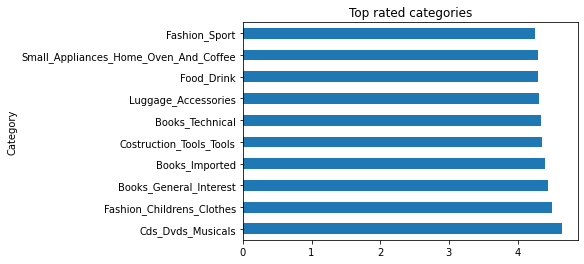

In [225]:
top_cat_review.plot(kind='barh',title='Top rated categories',xlabel='Category',legend=False)
plt.show()

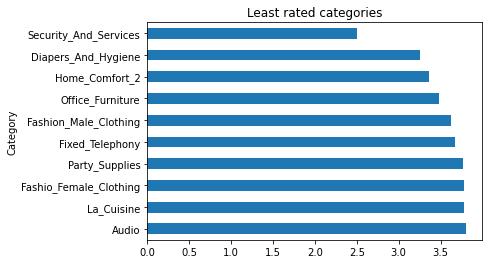

In [226]:
bottom_cat_review.plot(kind='barh',title='Least rated categories',xlabel='Category',legend=False)
plt.show()

Which products (top10) are maximum rated & minimum rated?


In [227]:
x = rev_item_product.groupby(by='product_id')['review_score'].mean().sort_values(ascending=False).to_frame()
top_product_review= x.head(10)
bottom_product_review= x.tail(10)

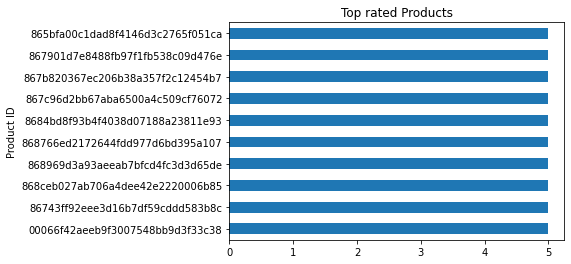

In [228]:
top_product_review.plot(kind='barh',title='Top rated Products',xlabel='Product ID',legend=False)
plt.show()

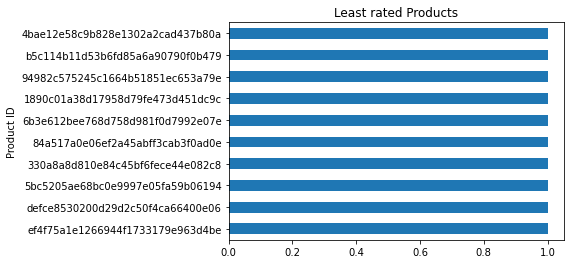

In [229]:
bottom_product_review.plot(kind='barh',title='Least rated Products',xlabel='Product ID',legend=False)
plt.show()

c. Average rating by location, seller, product, category, month etc.


In [230]:
cust_order_rev = cust_order.merge(review,on='order_id',how='inner')

In [231]:
#By City
cust_order_rev.groupby(by='customer_city')['review_score'].mean().sort_values(ascending=False)

customer_city
Manegaon         5.0
Chimbel          5.0
Kangrali (KH)    5.0
Chirgaon         5.0
Kanhirode        5.0
                ... 
Shelar           1.0
Shankargarh      1.0
Pilibhit         1.0
Hyderabad        1.0
Rawatsar         1.0
Name: review_score, Length: 4119, dtype: Float64

In [232]:
#By State
cust_order_rev.groupby(by='customer_state')['review_score'].mean().sort_values(ascending=False)

customer_state
Goa                       4.8
Punjab               4.197947
Rajasthan            4.189889
Tamil Nadu            4.16182
Uttar Pradesh        4.155405
Haryana              4.149955
Orissa               4.142173
Kerala               4.141001
Maharashtra          4.129786
Arunachal Pradesh    4.119153
Chhattisgarh         4.089828
Gujarat              4.085364
Madhya Pradesh       4.085136
Jammu & Kashmir      4.084142
Karnataka             4.07491
Delhi                4.061286
Andhra Pradesh       4.051443
West Bengal           4.04607
Himachal Pradesh     4.022727
Uttaranchal          3.917526
Name: review_score, dtype: Float64

In [233]:
#By Seller
items_rev = items.merge(review, on='order_id',how='inner')

In [234]:
items_rev.groupby(by='seller_id')['review_score'].mean()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.874477
001e6ad469a905060d959994f1b41e4f         1.0
002100f778ceb8431b7a1020ff7ab48f    3.982143
003554e2dce176b5555353e4f3555ac8         5.0
                                      ...   
ffcfefa19b08742c5d315f2791395ee5         1.0
ffdd9f82b9a447f6f8d4b91554cc7dd3        4.25
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.885246
ffff564a4f9085cd26170f4732393726         2.1
Name: review_score, Length: 3095, dtype: Float64

In [235]:
# By product
rev_item_product.groupby(by='product_id')['review_score'].mean()

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
00088930e925c41fd95ebfe695fd2655    4.0
0009406fd7479715e4bef61dd91f2462    1.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
                                   ... 
fff6177642830a9a94a0f2cba5e476d1    4.5
fff81cc3158d2725c0655ab9ba0f712c    4.0
fff9553ac224cec9d15d49f5a263411f    5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441    5.0
fffe9eeff12fcbd74a2f2b007dde0c58    4.0
Name: review_score, Length: 32951, dtype: Float64

In [236]:
# By product category
rev_item_product.groupby(by='product_category_name')['review_score'].mean()

product_category_name
Agro_Industry_And_Commerce         4.0
Air_Conditioning              3.919192
Art                            3.91866
Arts_And_Craftmanship            4.125
Audio                         3.808219
                                ...   
Stationery                    4.181386
Tablets_Printing_Image        4.048193
Telephony                     3.935604
Toys                          4.138667
Watches_Gifts                    4.002
Name: review_score, Length: 71, dtype: Float64

In [237]:
#BY month
orders_review = orders.merge(review,on='order_id',how='inner')

In [238]:
orders_review.groupby(by=['year','month'])['review_score'].mean()

year  month
2016  9             1.0
      10       3.529052
      12            5.0
2017  1        4.054523
      2        4.005034
      3        4.055988
      4        4.031937
      5        4.123896
      6        4.129997
      7        4.157325
      8        4.223823
      9        4.173469
      10       4.105918
      11       3.894446
      12       3.997895
2018  1        4.022016
      2        3.812087
      3        3.733931
      4        4.147173
      5        4.183668
      6        4.270209
      7        4.247545
      8        4.247313
      9            1.75
      10           2.25
Name: review_score, dtype: Float64